# Problem 1 : Uni-variate EDA

In [2]:
# **Q1. Problem Statement: Univariate EDA**

# Load the “cereal.csv” data into a DataFrame and perform the following tasks:

# 1.	Explore the DataFrame using info() and describe() functions

# 2.	Replace the manufacturer names with the dictionary of names given here –
# {'A':'American Home Food Products', 'G':'General Mills', 'K':'Kelloggs','N':'Nabisco', 'P':'Post', 'Q':'Quaker Oats', 'R':'Ralston Purina'}

# 3.	Find out the top five cereal manufacturers based on customer ratings

# 4.	With the help of a barplot, compare the manufacturers based on customer ratings

# 5.	With the help of a pie chart, find out which of the manufacturers are the largest producers of cereals


# 4.	Find out cereal manufacturers whose products are rich in protein but contains minimal calories, with the help of a scatter plot


# 5.	Using a heatmap, plot the correlation and covariance between all the nutritional values present in the cereals

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cereal.csv")
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [5]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [7]:
# Replace the manufacturer names
manufacturer_dict = {
    'A':'American Home Food Products', 
    'G':'General Mills', 
    'K':'Kelloggs',
    'N':'Nabisco', 
    'P':'Post', 
    'Q':'Quaker Oats', 
    'R':'Ralston Purina'}
df['mfr'] = df['mfr'].map(manufacturer_dict)
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,Ralston Purina,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,General Mills,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,General Mills,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,Ralston Purina,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,General Mills,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [8]:
# top five cereal manufacturers based on customer ratings
top_manufacturers = df.groupby('mfr')['rating'].mean().sort_values(ascending=False).head(5)
top_manufacturers

mfr
Nabisco                        67.968567
American Home Food Products    54.850917
Kelloggs                       44.038462
Quaker Oats                    42.915990
Post                           41.705744
Name: rating, dtype: float64

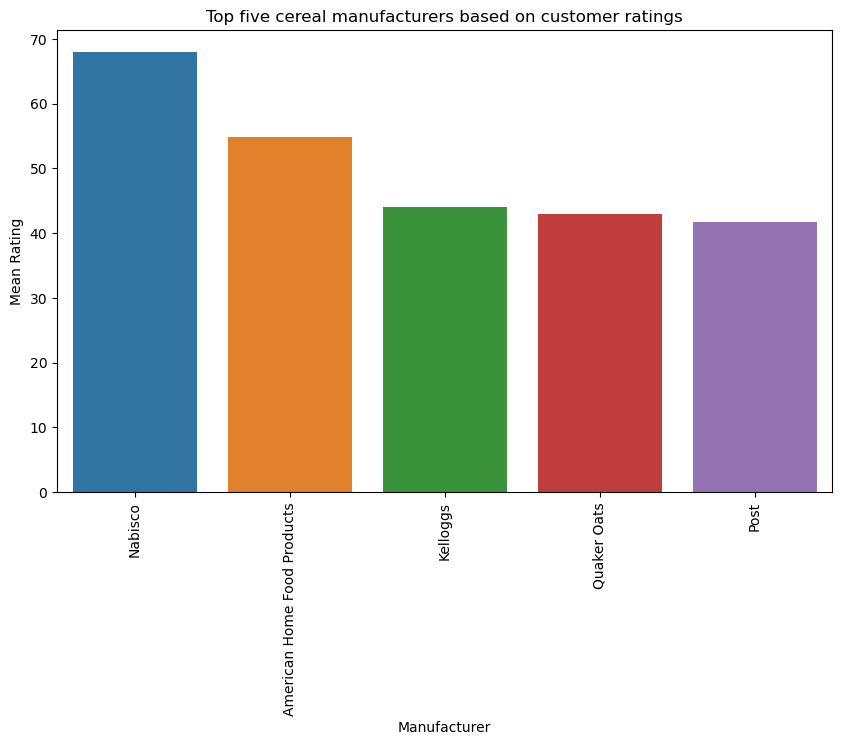

In [12]:
# Compare manufacturers based on customer ratings using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_manufacturers.index, y=top_manufacturers.values)
plt.title("Top five cereal manufacturers based on customer ratings")
plt.xlabel("Manufacturer")
plt.ylabel("Mean Rating")
plt.xticks(rotation=90)
plt.show()

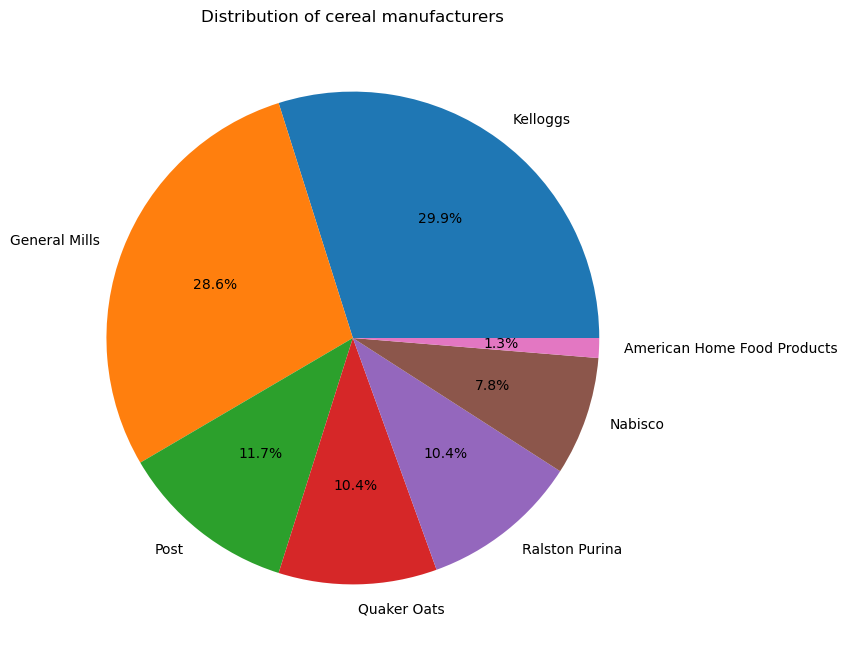

In [15]:
# Find out which manufacturers are the largest producers of cereals using a pie chart
manufacturer_counts = df['mfr'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(manufacturer_counts, labels=manufacturer_counts.index, autopct='%1.1f%%')
plt.title("Distribution of cereal manufacturers")
plt.show()

In [16]:
# Kellogs is largest producer of cereals

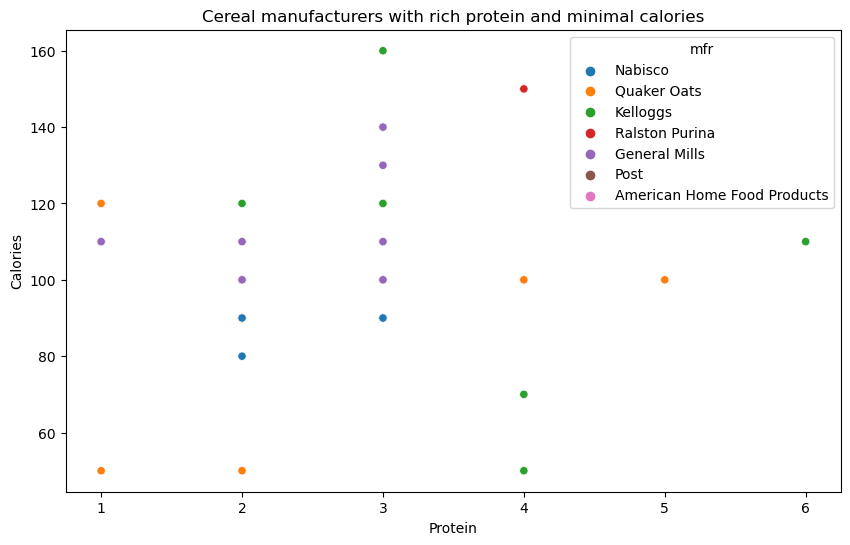

In [19]:
# Find out cereal manufacturers with rich protein and minimal calories using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='protein', y='calories', data=df, hue='mfr')
plt.title("Cereal manufacturers with rich protein and minimal calories")
plt.xlabel("Protein")
plt.ylabel("Calories")
plt.show()

In [20]:
# kellogs creals have rich protein and minimal calories

In [23]:
df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [25]:
# correlation and covariance between all nutritional values using a heatmap

# List of columns related to nutritional values
nutritional_columns = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']

# Create a new DataFrame containing only the nutritional columns
nutritional_df = df[nutritional_columns]
nutritional_df

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
0,70,4,1,130,10.0,5.0,6,280,25
1,120,3,5,15,2.0,8.0,8,135,0
2,70,4,1,260,9.0,7.0,5,320,25
3,50,4,0,140,14.0,8.0,0,330,25
4,110,2,2,200,1.0,14.0,8,-1,25
...,...,...,...,...,...,...,...,...,...
72,110,2,1,250,0.0,21.0,3,60,25
73,110,1,1,140,0.0,13.0,12,25,25
74,100,3,1,230,3.0,17.0,3,115,25
75,100,3,1,200,3.0,17.0,3,110,25


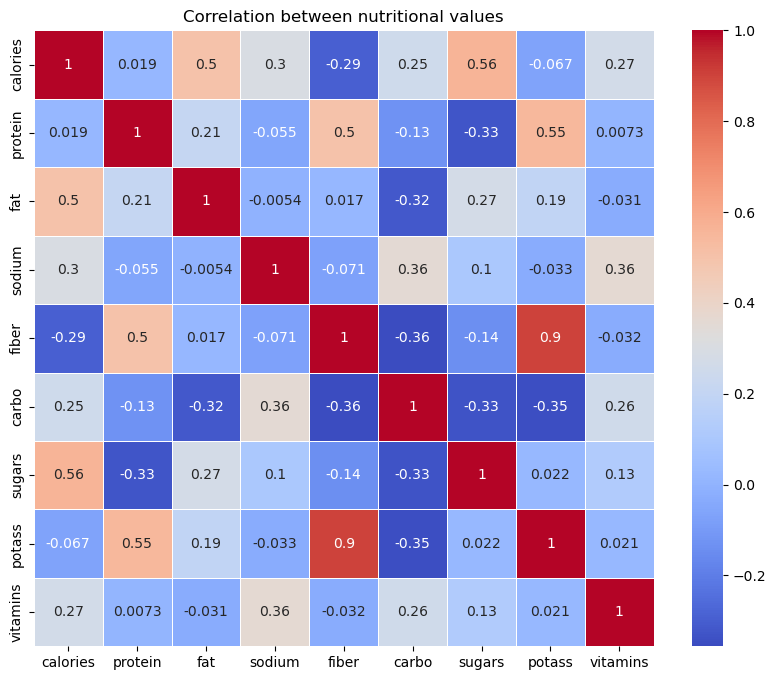

In [26]:
# corelation betwn nutritions
plt.figure(figsize=(10, 8))
sns.heatmap(nutritional_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation between nutritional values")
plt.show()

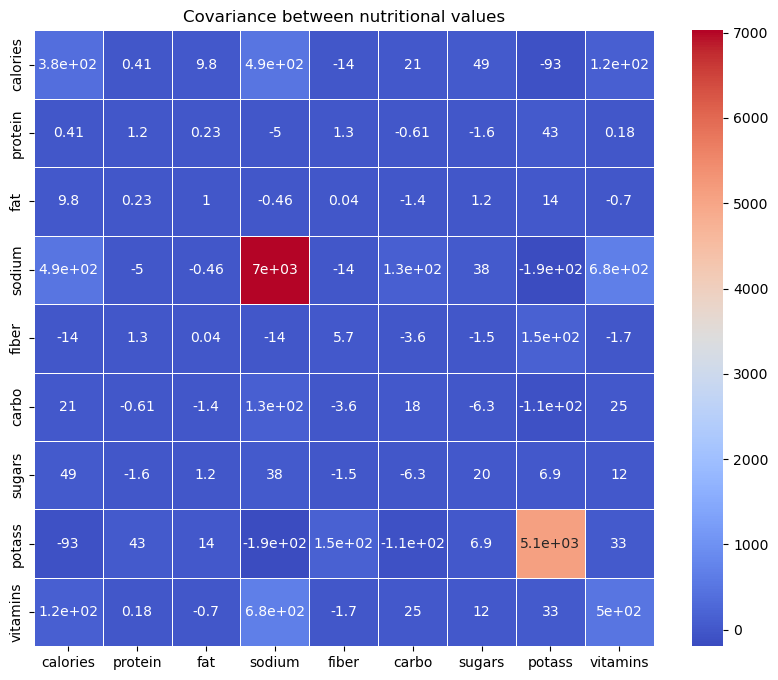

In [28]:
# covariance between nutitions
plt.figure(figsize=(10, 8))
sns.heatmap(nutritional_df.cov(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Covariance between nutritional values")
plt.show()

# Problem 2 : Web Scraping

In [30]:
#Web scraping

# Write  a  Python  program  that  can  extract  the  data  from  a  website  using  web scrapping concepts to perform the following tasks:

# 1.Use the request library and the link to extract the data.

# 2.Use BeautifulSoup to prepare the website's source code, then try to find a table on the source page.

# 3.After finding the table, extract data from all available columns and store it in the dataframe.Website Link:Use the below link to get the data from the table on the website.

# https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population


In [31]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population"
response = requests.get(url)
response

<Response [200]>

In [35]:
response.text

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>List of countries and dependencies by population - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-fea

In [36]:
soup = BeautifulSoup(response.text, 'html.parser')
soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of countries and dependencies by population - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature

In [37]:
table = soup.find('table', {'class': 'wikitable sortable'})
table

In [34]:
data = []
headers = []
for row in table.find_all('tr'):
    cells = row.find_all(['th', 'td'])
    if len(cells) > 1:
        if not headers:
            headers = [cell.text.strip() for cell in cells]
        else:
            data.append([cell.text.strip() for cell in cells])

data

AttributeError: 'NoneType' object has no attribute 'find_all'

In [45]:
# Find the section containing the table
table_section = soup.find('div', {'class': 'mw-parser-output'})
table_section
# tables = table_section.find_all('table', {'class': 'wikitable sortable'})

# table = tables[0]
# table

<div class="mw-parser-output"><span typeof="mw:File"><a href="/wiki/Wikipedia:Protection_policy#semi" title="This article is semi-protected."><img alt="Page semi-protected" class="mw-file-element" data-file-height="512" data-file-width="512" decoding="async" height="20" src="//upload.wikimedia.org/wikipedia/en/thumb/1/1b/Semi-protection-shackle.svg/20px-Semi-protection-shackle.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/1/1b/Semi-protection-shackle.svg/30px-Semi-protection-shackle.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/1/1b/Semi-protection-shackle.svg/40px-Semi-protection-shackle.svg.png 2x" width="20"/></a></span></div>